<a href="https://colab.research.google.com/github/ac-26/Image-Classification-using-CNN/blob/main/Image_Classification_using_CNN_(CIFAR10_Datset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
(X_train, y_train) , (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [11]:
classes[9]

'truck'

In [12]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

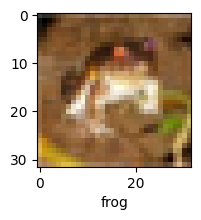

In [17]:
plot_sample(X_train, y_train, 0)

### **Normalizing to between 0 to 1**

In [19]:
X_train = X_train / 255
X_test = X_test / 255

In [20]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 185s 117ms/step - accuracy: 0.3054 - loss: 1.9291
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 166s 95ms/step - accuracy: 0.4203 - loss: 1.6457
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 192s 89ms/step - accuracy: 0.4535 - loss: 1.5562
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 149s 95ms/step - accuracy: 0.4768 - loss: 1.4844
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 197s 92ms/step - accuracy: 0.4942 - loss: 1.4319


In [21]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.69      0.54      1000
           1       0.47      0.77      0.59      1000
           2       0.43      0.27      0.33      1000
           3       0.35      0.30      0.32      1000
           4       0.47      0.33      0.39      1000
           5       0.31      0.55      0.40      1000
           6       0.58      0.43      0.49      1000
           7       0.57      0.53      0.55      1000
           8       0.68      0.50      0.57      1000
           9       0.67      0.32      0.43      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



In [22]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 46ms/step - accuracy: 0.3846 - loss: 1.6900
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 43ms/step - accuracy: 0.6042 - loss: 1.1260
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.6562 - loss: 0.9868
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.6852 - loss: 0.9024
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.7118 - loss: 0.8256


In [25]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.6873 - loss: 0.9122


[0.9289796948432922, 0.6812999844551086]

In [26]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


array([[1.05244601e-02, 6.17828406e-03, 7.39702303e-03, 6.36499166e-01,
        8.90752394e-03, 2.04627767e-01, 2.81273499e-02, 2.08229548e-03,
        9.40824896e-02, 1.57347287e-03],
       [1.85902175e-02, 4.73867469e-02, 2.15057171e-05, 5.11879352e-06,
        2.62879962e-06, 1.11211648e-07, 4.30734303e-07, 8.12331905e-07,
        9.30811405e-01, 3.18104401e-03],
       [3.72996360e-01, 7.54895136e-02, 4.07807948e-03, 2.54304777e-03,
        1.17219624e-03, 8.11123391e-05, 7.56529509e-04, 1.11911981e-03,
        5.25889814e-01, 1.58742834e-02],
       [5.14592111e-01, 7.86952823e-02, 1.83835700e-02, 1.21130666e-03,
        4.80175018e-03, 3.55244119e-05, 2.40202690e-03, 7.34783709e-04,
        3.69218320e-01, 9.92525276e-03],
       [2.19242465e-05, 1.04194204e-03, 1.12337805e-02, 3.50319743e-02,
        8.33110139e-02, 5.20094112e-03, 8.63641381e-01, 1.14847331e-04,
        3.31802759e-04, 7.04806880e-05]], dtype=float32)

In [27]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [31]:
y_test = y_test.reshape(-1,)

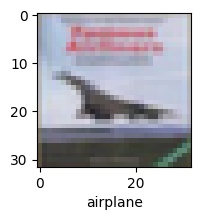

In [32]:
plot_sample(X_test, y_test,3)

In [33]:
classes[y_classes[3]]

'airplane'

### **We did this testing on smaller number of epochs comparing ANN and CNN results, We clearly observe that CNN is much faster and better.**

### **I did not run this on the full dataset yet because dataset is very complex and large. But you get the idea**